# **Does adverse selection exist in the medical insurance market**

In [1]:
import pandas as pd
import numpy as np
import os 
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from math import sqrt
from scipy.stats import norm

# **Describing the data**

The dataset is a secondary data source extracted from Kaggle. It describes 1338 individuals’ personal attributes on their age, sex, bmi, number of children, smoker status, place of residence in the U.S. and medical insurance charges. Insurance companies typically look at these variables to determine the individual’s coverage rates.   

In [2]:
# Read the dataset
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Description of variables**

Age: The integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex: The policyholders gender (M/F).

BMI: The policyholders body mass index, which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

Children: The integer indicating the number of children or dependents covered by the insurance plan.

Smoker: Whether the policyholder regularly smokes tobacco (Y/N).

Region: The policyholders place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest or northwest.

Charges: Individual medical costs billed to health insurance ($). 

In [3]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n", df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


The size of the datafame is 1338 x 7 and we have seven unique values. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical variables: sex, smoker, region, children (discrete variable).
    

Quantitative variables: age, bmi, charges (all class as continuous variables). 

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The main observations from the sample indicate that:
- The average age of a policy holder is 39.2 years old. The maximum age is 64 years old and the minimum age is 18 years old. 
- The average BMI in the sample is 30.66. This appears to be outside of the range of an ideal BMI which would fall between 18.5 and 24.9.
- Policyholders have on average one child.
- On average, medical bills amount to 13270 for policyholders. The minimum is 1122 and maximum is 63770.
- The mean is almost equal to the value of mean and median for age, bmi and number of children. This implies that the data follows a normal distribution. 

# **Exploratory Analysis**

**Pairplot of numerical values in dataset**

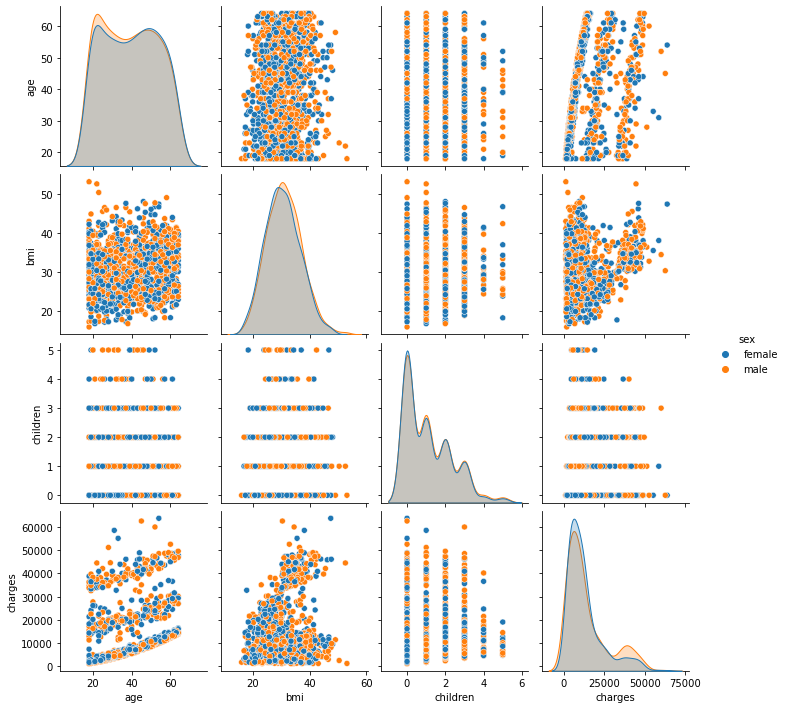

In [6]:
#Diagram 1
# This task is to measure the relationships between two quantitative variables
sns.pairplot(df, hue='sex', corner=False)

The pairplot allows us to see the distribution of numerical variables in the sample. The distribution highlights males and females, which allows us to understand the relationships within the sample. We can conclude age, bmi and charges follow a normal distribution as they display a bell shaped curve.

Charges and age: As the age of policyholders increases their medical bill charges also increase. There are instances where individuals of the same age pay higher charges, this may be due to the fact that they are 'high-risk' and display riskier lifestyle choices.

Charges and bmi: There is a postive correlation between charges and bmi, as bmi increases charges also increase. There are instances where individuals that have the same bmi pay higher charges, which could attribute to other 'high-risk' lifestyle choices. 

Charges and children: There appears to be no correlation between an increase in number of children and charges. More individuals in the sample appear to have between 0-3 children. 

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


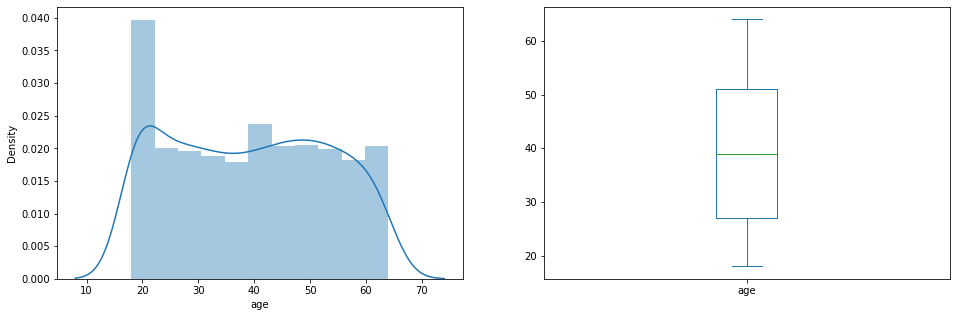

In [7]:
#Diagram 2
plt.figure(1) 
plt.subplot(121) 
df1=df.dropna() 
sns.distplot(df['age']); 
plt.subplot(122) 
df['age'].plot.box(figsize=(16,5)) 
plt.show()

Most policyholders are aged between 20 - 65 where the average age is 40.

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


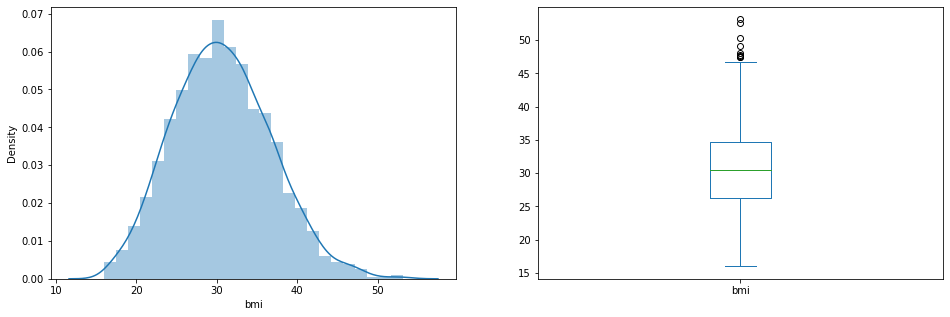

In [8]:
#Diagram 3
plt.figure(1) 
plt.subplot(121) 
df1=df.dropna() 
sns.distplot(df['bmi']); 
plt.subplot(122) 
df['bmi'].plot.box(figsize=(16,5)) 
plt.show()

BMI values in the sample follows a normal distribution. The average BMI appears to be 30.66 which is outside the ideal BMI range. There appears to be a few outliers towards the upper end of the sample. 

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


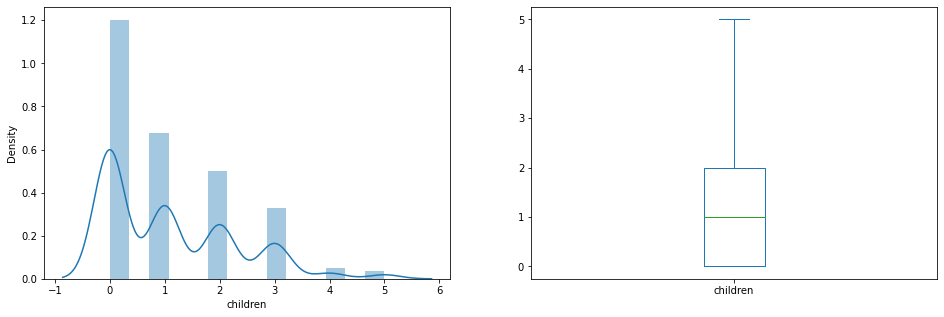

In [9]:
#Diagram 4
plt.figure(1) 
plt.subplot(121) 
df1=df.dropna() 
sns.distplot(df['children']); 
plt.subplot(122) 
df['children'].plot.box(figsize=(16,5)) 
plt.show()

More policyholders have zero children. If policholders do have children, they have on average one.

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


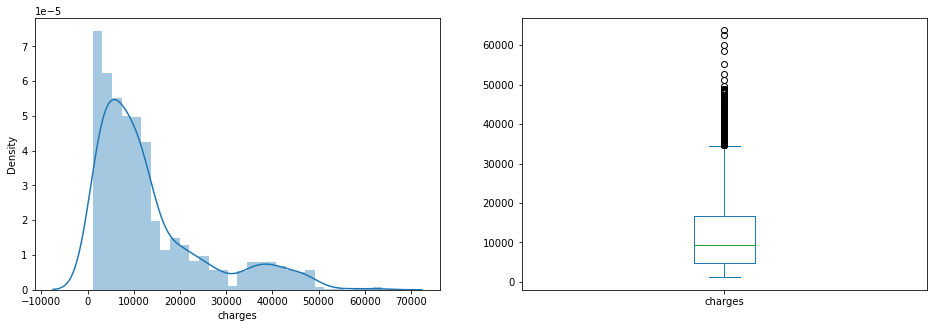

In [10]:
#Diagram 5
plt.figure(1) 
plt.subplot(121) 
df1=df.dropna() 
sns.distplot(df['charges']); 
plt.subplot(122) 
df['charges'].plot.box(figsize=(16,5)) 
plt.show()

The histogram for charges shows a unimodal distribution that is skewed to the right as outliers are more prominent towards the upper end. This may be because there are more 'high-risk' policyholder purchasing insurance which results in their charges being higher. The average charge is around 1338. 

# **Hypothesis Testing**

In order to answer the question 'does adverse selection exist in the medical insurance market?' we will test the impact various independent variables have on the dependent variable. This would involve testing the impact age, sex, bmi, number of children and smoking habits have on the medical insurance charges of policyholders. We will test three of the following one-tailed hypotheses:

**Test 1) Medical bill charges for policyholders that are smokers and non-smokers**

 𝐻0:𝜇1<=𝜇2  Average medical bill charges for smokers is less than or equal to nonsmokers
 
 𝐻𝑎:𝜇1>𝜇2  Average medical bill charges for smokers is greater than nonsmokers
 
 We will test at a significance level of 0.05.

In [11]:
smoker=df.loc[df.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [12]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
region      274
charges     274
dtype: int64

In [13]:
nonsmoker=df.loc[df.smoker=='no']
nonsmoker.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [14]:
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
region      1064
charges     1064
dtype: int64

In [15]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[-274:]
charges_yes = smoker.charges
charges_no = nonsmoker.charges

In [16]:
print('Average Cost charged to Insurance for smoker is {} and nonsmoker is {} '.format(charges_yes.mean(),charges_no.mean()))

Average Cost charged to Insurance for smoker is 32050.23183153285 and nonsmoker is 8441.24905576642 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Non Smoker Medical Bill Charges')]

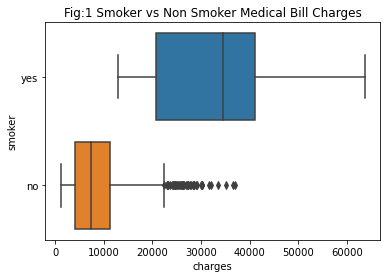

In [17]:
#Diagram 6
sns.boxplot(x=df.charges,y=df.smoker,data=df).set(title="Fig:1 Smoker vs Non Smoker Medical Bill Charges")

In [18]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 30.168384427571915 , Pvalue =2.160499003168038e-118 , OnetailPvalue = 1.080249501584019e-118


In [19]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.080249501584019e-118 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


We have sufficient evidence to reject the null hypothesis that average medical bill charges for smokers is less than or equal to nonsmokers. This means that smokers incur higher medical bill charges than non-smokers. On average costs charged to smokers is 32050 and costs charged to non-smokers is 8441.

**Test 2) Medical bill charges for male and female policyholders**

 𝐻0:𝜇1<=𝜇2  Average medical bill charges for male policyholders is less than or equal to female policyholders
 
 𝐻𝑎:𝜇1>𝜇2  Average medical bill charges for male policyholders is greater than female policyholders
 
 We will test at a significance level of 0.05.

In [20]:
#obtaining male and female observations
df_male=df.loc[df.sex=="male"]
df_female=df.loc[df.sex=="female"]

In [21]:
charges_male = df_male.charges
charges_female = df_female.charges

In [22]:
print('Average Cost charged to Insurance for male is {} and female is {} '.format(charges_male.mean(),charges_female.mean()))

Average Cost charged to Insurance for male is 13956.751177721886 and female is 12569.57884383534 


[Text(0.5, 1.0, 'Fig:1 Female vs Male Medical Bill Charges')]

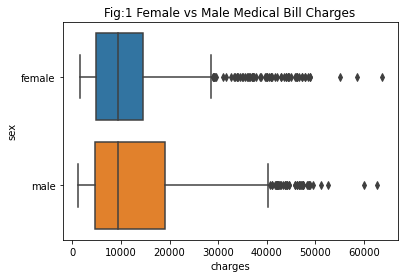

In [23]:
#Diagram 7
sns.boxplot(x=df.charges,y=df.sex,data=df).set(title="Fig:1 Female vs Male Medical Bill Charges")

In [24]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_male, charges_female)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 2.097546590051688 , Pvalue =0.03613272100592976 , OnetailPvalue = 0.01806636050296488


In [25]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for males are less than or equal to females.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for males are less than females.")

Conclusion:Since P value 0.01806636050296488 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for males are less than or equal to females.


We have sufficient evidence to reject the null hypothesis that average medical bill charges for males is less than or equal to females. This means that males incur higher medical bill charges than females. On average costs charged to males is 13957 and costs charged to females is 125670.

**Test 3) Medical bill charges for non-ideal bmi and ideal bmi policyholders policyholders**

 𝐻0:𝜇1<=𝜇2  Medical bill charges for policyholders outside the ideal bmi range (19.5 - 24.9) is less than or equal to policyholders that do have an ideal bmi
 
 𝐻𝑎:𝜇1>𝜇2  Medical bill charges for policyholders outside the ideal bmi range (19.5 - 24.9) is greater than policyholders that do have an ideal bmi
 
We will test at a significance level of 0.05.

In [26]:
#Splitting the dataset for bmi values within range 19.5 - 24.9 (ideal bmi range)
thresh_low = 19.5
thresh_high = 24.9
mask = (df['bmi'] > thresh_low) & (df['bmi'] < thresh_high)

bmi_ideal = df[mask]

In [27]:
#Splitting the dataset for bmi values lower than 19.5
thresh_low = 19.5
thresh_high = 24.9
mask1 = (df['bmi'] < thresh_low) 

df3 = df[mask1]

In [28]:
#Splitting dataset for bmi values higher than 24.9
thresh_low = 19.5
thresh_high = 24.9
mask2 = (df['bmi'] > thresh_high)

df4 = df[mask2]

In [29]:
#Combining bmi values lower than 19.5 and higher than 24.9 (perceived as being outside of the 'ideal' bmi range)
bmi_not_ideal = pd.concat([df3, df4])

In [30]:
charges_bmi_ideal = bmi_ideal.charges
charges_bmi_not_ideal = bmi_not_ideal.charges

In [31]:
print('Average Cost charged to Insurance for non-ideal bmi is {} and ideal bmi is {} '.format(charges_bmi_not_ideal.mean(),charges_bmi_ideal.mean()))

Average Cost charged to Insurance for non-ideal bmi is 13812.80451631911 and ideal bmi is 10405.727276525824 


In [32]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_bmi_not_ideal, charges_bmi_ideal)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 3.7837951873500035 , Pvalue =0.00016128918612656425 , OnetailPvalue = 8.064459306328213e-05


In [33]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that average charges for policyholders that do not have an ideal bmi is less than or equal to policyholders that do have an ideal bmi.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that average charges for policyholders that do not have an ideal bmi are less than or equal to policyholders that do have an ideal bmi.")

Conclusion:Since P value 8.064459306328213e-05 is less than alpha 0.05 
Reject Null Hypothesis that average charges for policyholders that do not have an ideal bmi is less than or equal to policyholders that do have an ideal bmi.


We have sufficient evidence to reject the null hypothesis that average charges for policyholders who do not have an ideal bmi (outside of the range 19.5 - 24.9) is less than or equal to policyholders that do have an ideal bmi. This means that if a policyholders bmi is outside of the ideal range, they can expect to be paying higher medical charges. 

# **ANOVA Testing**

**One-way ANOVA testing**

We will conduct a series of  one-way ANOVA tests to assess data organised into several groups based on one single grouping variable. One-way ANOVA is used to measure statistically significant differences between the means of independent groups.

**Test 4) Policyholder charges across region**

In this example, the one factor (explanatory variable) is the region the policyholder is from (northeast, southeast, northwest and southwest). Let 𝜇1=𝜇2=𝜇3=𝜇4 denote the mean charges for individuals across the regions.

H0: 𝜇1=𝜇2=𝜇3=𝜇4

H1: there is a significant difference between the mean charges which indicates at least one of the mean charges across the regions is not the same.

We will test at a significance level of 0.05.

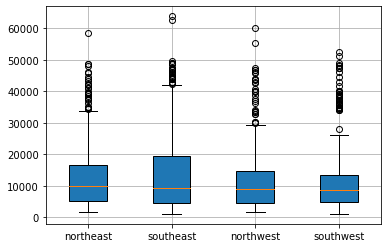

F_onewayResult(statistic=2.9696266935891193, pvalue=0.0308933560705201) 

Significant differences exist between the charges of policyholders for each region.


In [35]:
# Create arrays for three datasets (in terms of "charges") to be compared
# Use dropna() to remove the rows with missing value (i.e. charges = NA)
northeast_insured = df[df.region == "northeast"].charges.dropna()
southeast_insured = df[df.region == "southeast"].charges.dropna()
northwest_insured = df[df.region == "northwest"].charges.dropna()
southwest_insured = df[df.region == "southwest"].charges.dropna()

#Diagram 8
# Create side-by-side boxplots for the policyholders from the four regions
box_plot_data=[northeast_insured, southeast_insured, northwest_insured, southwest_insured]
plt.boxplot(box_plot_data,patch_artist=True,labels=['northeast','southeast','northwest', 'southwest'])
plt.grid()
plt.show()

# Perform one-way ANOVA
anova = stats.f_oneway(northeast_insured, southeast_insured, northwest_insured, southwest_insured)
print(anova, "\n")

# Test significance
alpha= 0.05
if (anova[1] < alpha):
    print("Significant differences exist between the charges of policyholders for each region.")
else:
    print ("No significant differences exist between the charges of policyholders for each region.")

Therefore, there is sufficient evidence to reject H0: 𝜇1=𝜇2=𝜇3=𝜇4. We can conclude that there is significant difference in the mean charges across the four different regions in the sample. 

**Test 5) Policyholder BMI across regions**

In this example, the one factor (explanatory variable) is the region the policyholder is from (northeast, southeast, northwest and southwest). Let 𝜇1=𝜇2=𝜇3=𝜇4 denote the mean bmi for individuals across the regions.

H0: 𝜇1=𝜇2=𝜇3=𝜇4

H1: there is a significant difference between the population bmi means which indicates at least one of the mean bmi values across the regions is not the same.

We will test at a significance level of 0.05.

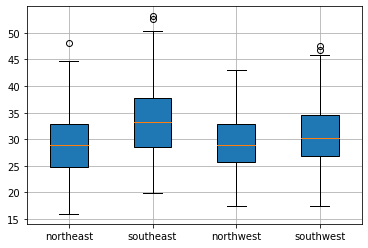

F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24) 

Significant differences exist between the bmi of policyholders for each region.


In [36]:
# Create arrays for three datasets (in terms of "bmi") to be compared
# Use dropna() to remove the rows with missing value (i.e. bmi = NA)
northeast_insured = df[df.region == "northeast"].bmi.dropna()
southeast_insured = df[df.region == "southeast"].bmi.dropna()
northwest_insured = df[df.region == "northwest"].bmi.dropna()
southwest_insured = df[df.region == "southwest"].bmi.dropna()

# Diagram 9
# Create side-by-side boxplots for the policyholders from the four regions
box_plot_data=[northeast_insured, southeast_insured, northwest_insured, southwest_insured]
plt.boxplot(box_plot_data,patch_artist=True,labels=['northeast','southeast','northwest', 'southwest'])
plt.grid()
plt.show()

# Perform one-way ANOVA
anova = stats.f_oneway(northeast_insured, southeast_insured, northwest_insured, southwest_insured)
print(anova, "\n")

# Test significance
alpha= 0.05
if (anova[1] < alpha):
    print("Significant differences exist between the bmi of policyholders for each region.")
else:
    print ("No significant differences exist between bmi of policyholders for each region.")

Therefore, there is sufficient evidence to reject H0: 𝜇1=𝜇2=𝜇3=𝜇4. We can conclude that there is significant difference in the population mean bmi across the four regions.

**Test 6) Female policyholder charges with zero, one or two children**

In this example, the one factor (explanatory variable) is women with no children, one child and two children. Let 𝜇1=𝜇2=𝜇3 denote the mean charges for women with no children, one child and two children.

H0: 𝜇1=𝜇2=𝜇3

H1: there is a significant difference between the mean charges which indicates at least one of the mean charges for women is not the same.

We will test at a significance level of 0.05.

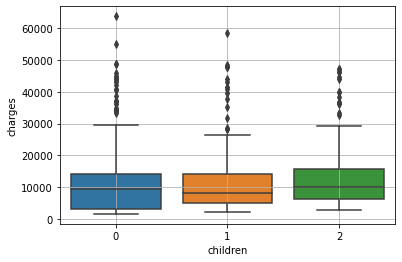

F_onewayResult(statistic=nan, pvalue=nan) 

No significant differences exist between the charges of female policyholders with 0, 1 and 2 children.


/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


In [37]:
#Filtering for women with 0, 1 and 2 children
df_female_child = df_female.loc[df_female['children']<=2]

# Create arrays for three datasets (in terms of "charges") to be compared
# Use dropna() to remove the rows with missing value (i.e. charges = NA)
children_zero = df_female_child[df_female_child.children == "0"].charges.dropna()
children_one = df_female_child[df_female_child.children == "1"].charges.dropna()
children_two = df_female_child[df_female_child.children == "2"].charges.dropna()

# Diagram 10
# Create side-by-side boxplots for the female policyholders with 0, 1 and 2 children
sns.boxplot(x="children", y="charges", data=df_female_child)
plt.grid()
plt.show()

# Perform one-way ANOVA
anova = stats.f_oneway(children_zero, children_one, children_two)
print(anova, "\n")

# Test significance
alpha= 0.05
if (anova[1] < alpha):
    print("Significant differences exist between the charges of female policyholders with 0, 1 and 2 children.")
else:
    print ("No significant differences exist between the charges of female policyholders with 0, 1 and 2 children.")

Therefore, there is sufficient evidence to accept H0: 𝜇1=𝜇2=𝜇3. We can conclude that there is no significant difference in the charges for female policyholders that have zero, one or two children.

**Two-way ANOVA testing**

In two-way ANOVA testing we are assessing two independents affecting a dependent variable. 

**Test 7) Mean charges across male and females that smoke or do not smoke**

In two-way ANOVA we can test that:

H0: Mean number of charges is equal for male and female policyholders that smoke or do not smoke (in general, there is no effect of factor A on the response variable)

H1: Mean number of charges is not equal for male and female policyholder that smoke or do not smoke (in general, there is an effect of factor A on the response variable)

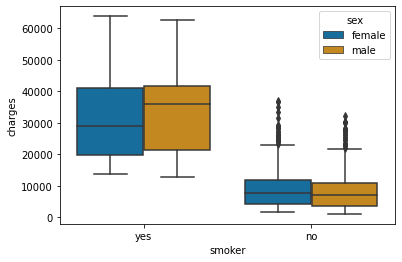

                sum_sq      df            F         PR(>F)
smoker    1.208777e+11     1.0  2164.527244  1.190490e-281
sex       1.421312e+06     1.0     0.025451   8.732723e-01
Residual  7.455290e+10  1335.0          NaN            NaN
              df        sum_sq       mean_sq            F         PR(>F)
smoker       1.0  1.215199e+11  1.215199e+11  2176.026401  1.331344e-282
sex          1.0  1.421312e+06  1.421312e+06     0.025451   8.732723e-01
Residual  1335.0  7.455290e+10  5.584487e+07          NaN            NaN
                      df        sum_sq       mean_sq            F  \
C(smoker)            1.0  1.215199e+11  1.215199e+11  2188.851370   
C(sex)               1.0  1.421312e+06  1.421312e+06     0.025601   
C(smoker):C(sex)     1.0  4.923397e+08  4.923397e+08     8.868165   
Residual          1334.0  7.406056e+10  5.551766e+07          NaN   

                         PR(>F)  
C(smoker)         1.389467e-283  
C(sex)             8.729026e-01  
C(smoker):C(sex)   2.954

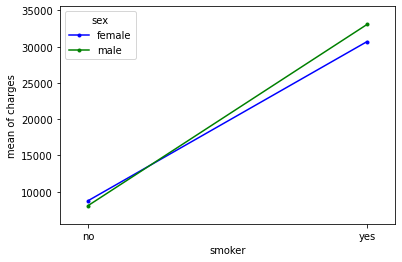

In [38]:
#Diagram 11
# generate a boxplot to see the data distribution by sex and smokers/non-smokers
# Using boxplot, we can easily detect the differences between different groups
sns.boxplot(y='charges', x='smoker',
                data=df,
                palette="colorblind",
                hue='sex')
plt.show()

# Create model
formula = 'charges ~ smoker + sex'
model = smf.ols(formula, data=df).fit()

# Perform ANOVA test and print results (type 2 result)
aov_table2 = sm.stats.anova_lm(model, typ=2)
print(aov_table2)

# Perform two-way ANOVA test and print results (type 1 result)
aov_table1 = sm.stats.anova_lm(model, typ=1)
print(aov_table1)
model = smf.ols('charges ~ C(smoker) + C(sex) + C(smoker):C(sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)

# Diagram 12
# output
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['smoker'], trace=df['sex'], response=df['charges'],
    colors=['Blue','Green'])
plt.show()

# The ANOVA test result gives p-value =2.954255e-03 . This is not much evidence of interaction between two factors.

For smoker status, we obtained an F-statistic of 2188.85 and p-value 1.389467e-283. There is strong evidence to support that mean charges depend on an individual’s smoking status. For sex, we obtained an F-statistic of 0.025601 and p-value 8.729026e-01. There is weak evidence to support that mean charges depend on the individual’s sex, suggesting there may be adverse selection. There is hardly any evidence of interaction between sex and smokers as the p-value is 2.954255e-03.

Diagram twelve supports this claim as non-smokers pay less than 10,000 charges and smokers pay at least 34,000. Charges are only marginally different for males and females that are smokers or non-smokers. Thus, an individual’s smoker status has more impact on charges than their sex. Gender could be less significant in health insurance charges because Western countries began to introduce new regulations that disregarded the effects of gender (Bereketoglu, 2022). 

**Test 8) Mean charges for smokers across male and females in four different regions**

In two-way ANOVA we can test that:

H0: Mean number of charges for smokers is equal for males and females across the four different regions (in general, there is no effect of factor A on the response variable)

H1: Mean number of charges for smokers is not for equal males and females across the four different regions (in general, there is an effect of factor A on the response variable)

                sum_sq     df         F    PR(>F)
sex       2.968746e+08    1.0  2.296362  0.130852
region    1.216535e+09    3.0  3.136684  0.025952
Residual  3.477643e+10  269.0       NaN       NaN
                      df        sum_sq       mean_sq         F    PR(>F)
C(sex)               1.0  6.435902e+08  6.435902e+08  4.416335  0.035784
C(region)            3.0  1.270239e+09  4.234129e+08  2.905472  0.033691
C(sex):C(region)     3.0  3.401733e+08  1.133911e+08  0.778093  0.506208
Residual          1330.0  1.938202e+11  1.457295e+08       NaN       NaN


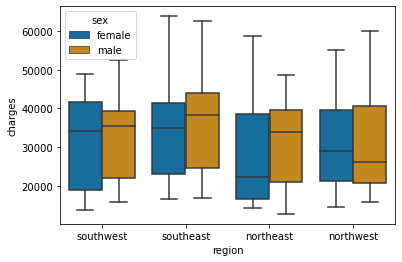

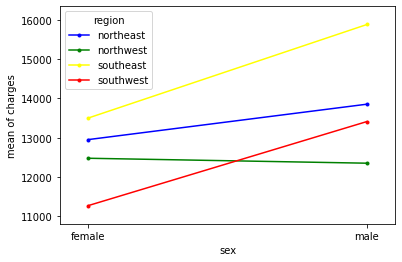

In [39]:
# This task is to practise two-way ANOVA which involves two factors with 2+ levels.
# Read the dataset
insurance_1=df[df.smoker == "yes" ].dropna(subset=["charges"])

# Diagram 13
# Filter out the individuals from southwest and southeast only
insurance=insurance_1[insurance_1.region.isin(["northwest", "southwest", "northeast" "southeast"])]
sns.boxplot(y='charges', x='region',
                data=insurance_1,
                palette="colorblind",
                hue='sex')

# Create model
formula = 'charges ~ sex + region'
model = smf.ols(formula, data=insurance_1).fit()

# Perform two-way ANOVA and print ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

# p-values are shown in the rightmost columns "PR(>F)"
# Results show region has a significant effect, while sex has no significant effect

# This is to test the interaction effect between factors in two-way ANOVA
model = smf.ols('charges ~ C(sex) + C(region) + C(sex):C(region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)

# Diagram 14
# output
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['sex'], trace=df['region'], response=df['charges'],
colors=['Blue','Green','Yellow','Red'])
plt.show()

# The ANOVA test result gives p-value =0.50. This is not much evidence of interaction between two factors.

For sex, we obtained an F-statistic of 2.296362 and p-value 0.130852. There is some evidence to support that mean charges across smokers depend on the individual’s sex. For region, we obtained an F-statistic of 3.136684 and p-value of 0.025952. There is some evidence to support that mean charges across smokers has relation to the individual’s region. Thus, sex has more impact than region for policyholders that smoke, although there is hardly any evidence of interaction between sex and region as the p-value is 0.5. 

In diagram fourteen, across all region’s males pay more charges than females, particularly those in the southeast. Research suggests that a higher cost of living in urban areas compared to rural areas results in expensive healthcare insurance in urban areas. Companies also use monopolistic power to increase costs for areas with fewer health insurance companies (Wengle, 2018). 